### Customer Churn Analysis - Telco Customers 

What is Customer Churn?

Customer churn is one of the most important metrics for a growing business to evaluate especially in telecome industry.
The number relates to the hard truth about its customer retention and it signifies the costs more to acquire new customers than it does to retain existing customers. In fact, an increase in customer retention of just 5% can create at least a 25% increase in profit. This is because returning customers will likely spend 67% more on company's products and services.
As a result,company can spend less on the operating costs of having to acquire new customers. we don't need to spend time and money on convincing an existing customer to select the company over competitors because they've already made that decision.

How to Reduce Customer Churn?
1. Focus our attention on our best customers.
2. Analyze churn as it occurs.
3. Show the customers that we care.

We are going to do analysis on Customer Churn for Telco customers and evaluate the best model to extract the feature attributes to 

In [1]:
"""
Make the imports of python packages needed
"""
# Import all the tools we need

# Regular EDA ( Exploratory data analysis ) and plotting libraries
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import pydotplus
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
#loading data file
import warnings
warnings.filterwarnings("ignore")

# Models from SCikit -Learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# we want our plots to appear inside the notebook
%matplotlib inline

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
          

In [2]:
df = pd.read_csv('Telco-Customers.csv')
df.shape

(7043, 21)

### Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

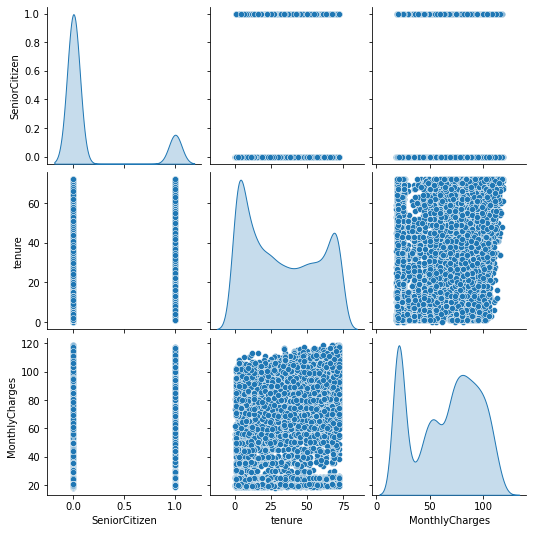

In [5]:
sns.pairplot(data=df,diag_kind='kde')

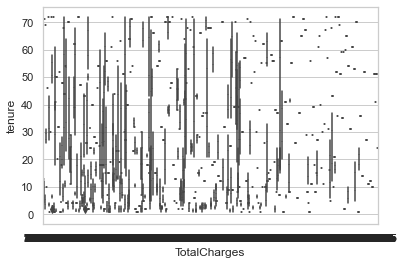

In [6]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["TotalCharges"],y=df["tenure"])

In [7]:
# Are there any missing values?
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

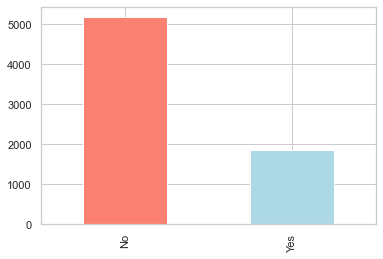

In [8]:
df["Churn"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Here  TotalCharges is showing as object but it is actually "Float" -  implies existence of missing values
 tc=pd.to_numeric(df0.TotalCharges) #causes ValueError: Unable to parse string " "

In [10]:
# convert " " to 0
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')
df['TotalCharges']= pd.to_numeric(df.TotalCharges)


In [11]:
# Finding the datatypes of columns
type_cols = df.select_dtypes(object)
type_cols

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


### Convering Categorical features into Binary values

In [12]:
# Convert Yes/No into Binary values (0 ,1)
#'No internet service' can also be set to zero

Nkeys=[k for k in list(type_cols.keys()) if type_cols[k][0] in ['Yes','No']]
for k in Nkeys:
    df[k].replace(('Yes', 'No','No internet service'), (1, 0, 0), inplace=True)

In [13]:
# Categorical features here are gender,muliple lines,Internet service,contract,payment method
# categorical to one-hot Encoder

New_df=pd.get_dummies(df,columns=['InternetService','Contract','PaymentMethod'])

# Converting  Gender and MutilpleLines into Binary values (using replace function)
gender = New_df['gender'].replace(['Female','Male'],[0,1],inplace=True)
MultipleLines = New_df['MultipleLines'].replace(['No phone service','No','Yes'],[0,0,1],inplace =True)



In [14]:
New_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [15]:
New_df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,...,0.343746,0.439585,0.216669,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,...,0.474991,0.496372,0.412004,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


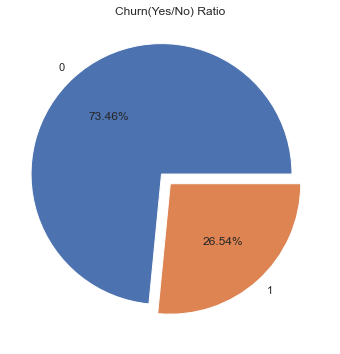

In [16]:
#View the number and proportion of lost users
plt.figure(figsize=(6,6))
plt.pie(New_df['Churn'].value_counts(),labels=New_df['Churn'].value_counts().index,autopct='%0.2f%%',explode=(0.1,0))
plt.title('Churn(Yes/No) Ratio')
plt.show()

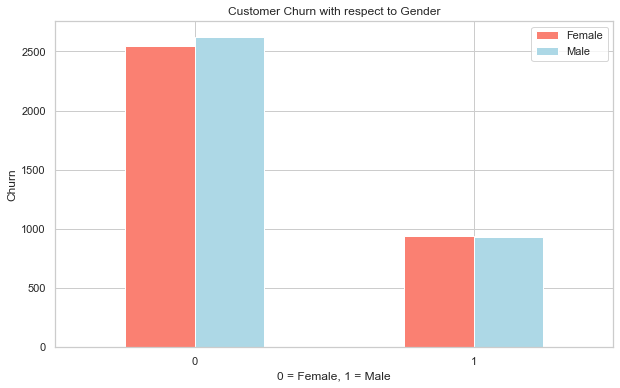

In [17]:
# Create a plot of crosstab
pd.crosstab(New_df.Churn,New_df.gender).plot(kind ="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Customer Churn with respect to Gender")
plt.xlabel("0 = Female, 1 = Male")
plt.ylabel("Churn")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

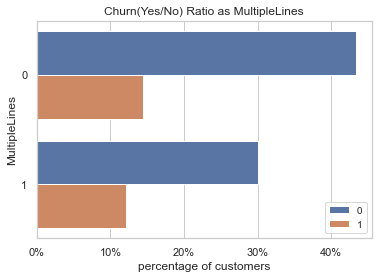

<Figure size 648x324 with 0 Axes>

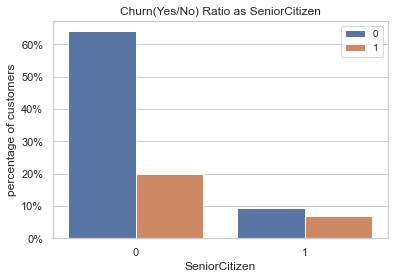

<Figure size 648x324 with 0 Axes>

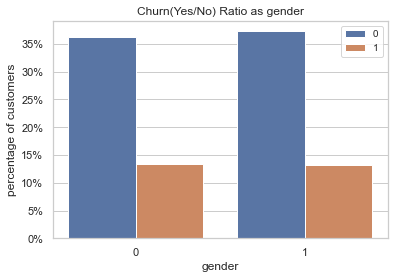

<Figure size 648x324 with 0 Axes>

In [18]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = New_df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot() 
    plt.legend(fontsize=10)
    plt.title('Churn(Yes/No) Ratio as {0}'.format(feature))
    plt.figure(figsize=(9, 4.5))
    plt.show()

barplot_percentages("MultipleLines", orient='h')
barplot_percentages("SeniorCitizen")
barplot_percentages("gender")

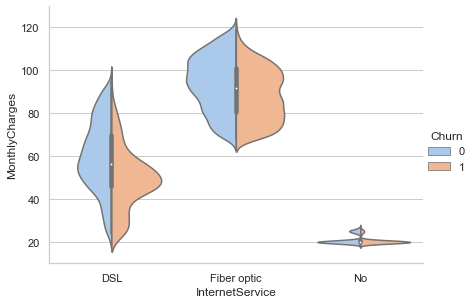

In [19]:
ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4)

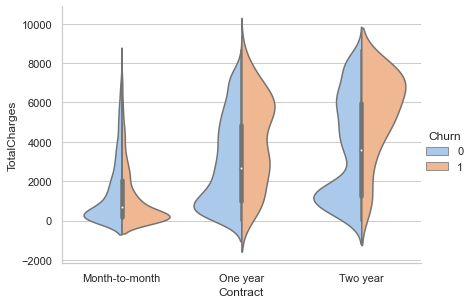

In [20]:
ax = sns.catplot(x="Contract", y="TotalCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4)

In [21]:
# Make a correlation Matrix
New_df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.017021,-0.013773,-0.002105,...,0.006568,-0.011286,0.006026,-0.003386,0.008026,-0.003695,-0.016024,0.001215,0.000752,0.013744
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,...,-0.108322,0.255338,-0.182742,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,...,-0.000851,0.000304,0.000615,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,...,0.052010,-0.165818,0.139812,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,...,0.013274,0.019720,-0.039062,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,...,-0.452425,0.289999,0.172209,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,...,-0.199920,0.366083,-0.210564,-0.088203,-0.003794,0.106253,0.075527,0.060048,0.083618,-0.227206
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,...,0.321269,-0.030696,-0.333403,-0.246679,0.100162,0.191773,0.095158,0.115721,-0.112338,-0.080798
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,...,0.157884,0.165651,-0.381593,-0.164172,0.083722,0.111400,0.087004,0.090785,-0.000408,-0.174164
DeviceProtection,-0.002105,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,...,0.146291,0.176049,-0.380754,-0.225662,0.102495,0.165096,0.083115,0.111554,-0.003351,-0.187373


(27.5, -0.5)

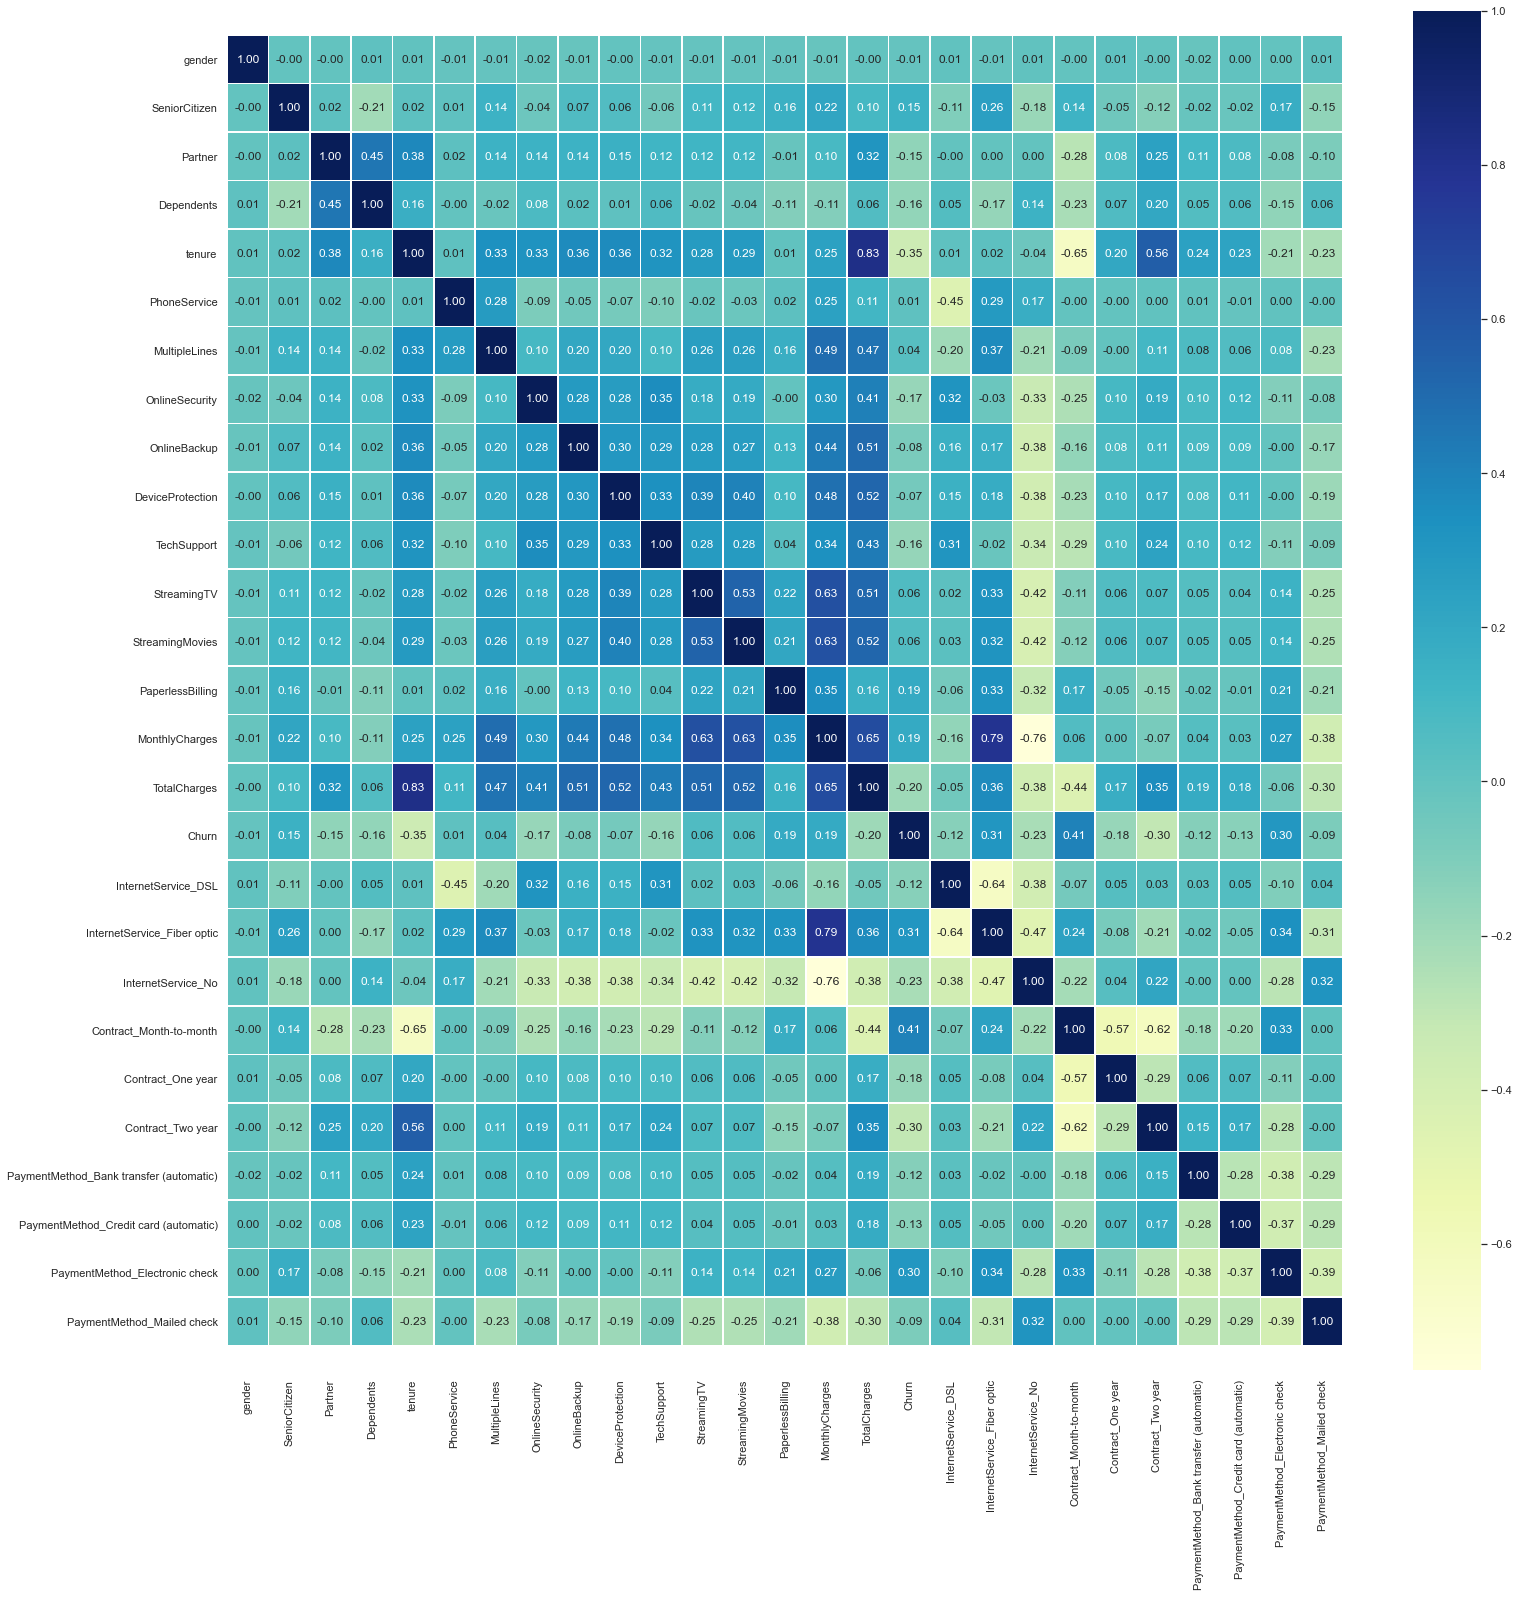

In [22]:
# Let's make our correlation matrix a little prettier
corr_matrix = New_df.corr()
fig,ax = plt.subplots(figsize =(25,25))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu");
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top-0.5)

In [23]:
Num_df = df.iloc[:,[1,5,6,8,11,13,15,16,17,18,20]]

In [24]:
Num_df.head()

,gender,tenure,PhoneService,InternetService,DeviceProtection,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,1,0,DSL,0,0,Month-to-month,1,Electronic check,29.85,0
1,Male,34,1,DSL,1,0,One year,0,Mailed check,56.95,0
2,Male,2,1,DSL,0,0,Month-to-month,1,Mailed check,53.85,1
3,Male,45,0,DSL,1,0,One year,0,Bank transfer (automatic),42.30,0
4,Female,2,1,Fiber optic,0,0,Month-to-month,1,Electronic check,70.70,1


In [25]:
Num_df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [26]:
Num_df["gender"] = Num_df["gender"].apply(lambda x: 1 if x=='Female' else 0)
Num_df["PhoneService"] = Num_df["PhoneService"].apply(lambda x: 1 if x=='Yes' else 0)
Num_df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
Num_df['Churn'].replace(to_replace='No',  value=0, inplace=True)

Num_df["PaperlessBilling"] = Num_df["PaperlessBilling"].apply(lambda x: 1 if x=='Yes' else 0)

In [27]:
Num_df = pd.get_dummies(Num_df,columns=['InternetService',
       'DeviceProtection', 
       'StreamingTV',
       'Contract',
       'PaymentMethod',],drop_first=False)

In [28]:
Num_df.head()

,gender,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,DeviceProtection_0,DeviceProtection_1,StreamingTV_0,StreamingTV_1,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,0,0,29.85,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
1,0,34,0,0,56.95,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1
2,0,2,0,0,53.85,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1
3,0,45,0,0,42.30,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0
4,1,2,0,0,70.70,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0


In [29]:
Num_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   PhoneService                             7043 non-null   int64  
 3   PaperlessBilling                         7043 non-null   int64  
 4   MonthlyCharges                           7043 non-null   float64
 5   Churn                                    7043 non-null   int64  
 6   InternetService_DSL                      7043 non-null   uint8  
 7   InternetService_Fiber optic              7043 non-null   uint8  
 8   InternetService_No                       7043 non-null   uint8  
 9   DeviceProtection_0                       7043 non-null   uint8  
 10  DeviceProtection_1                       7043 no

In [30]:
y = Num_df["Churn"]
X = Num_df.drop(['Churn'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=100,shuffle=True)

In [31]:
# Put models in a dictionary

models = { "Logistic Regression": LogisticRegression(),
            "Naive Bayes": GaussianNB(),
            "Stochastic Gradient": SGDClassifier(),
            "KNeighbors Classifier": KNeighborsClassifier(),
            "DecisionTree Classifier": DecisionTreeClassifier(),
            "RandomForest Classifier": RandomForestClassifier(),
            }
# Create a function to fit and score models

def fit_and_score(models, X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different SCikit-Learn machine learning models
    X_train : training data(no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # set random seeed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model scores
        model_scores[name] = model.score(X_test,y_test)
        isimler = model.__class__.__name__
        y_pred = model.predict(X_test)
        dogruluk = accuracy_score(y_test, y_pred)
        print("-"*28)
        print(isimler + ":" )
        print("Accuracy: {:.4%}".format(dogruluk))
    return model_scores

In [32]:
model_scores = fit_and_score(models=models,
                             X_train= X_train,
                             X_test= X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

----------------------------
LogisticRegression:
Accuracy: 77.2856%
----------------------------
GaussianNB:
Accuracy: 70.3578%
----------------------------
SGDClassifier:
Accuracy: 65.3606%
----------------------------
KNeighborsClassifier:
Accuracy: 75.2981%
----------------------------
DecisionTreeClassifier:
Accuracy: 71.2095%
----------------------------
RandomForestClassifier:
Accuracy: 75.0710%


{'Logistic Regression': 0.7728563316297559,
 'Naive Bayes': 0.7035775127768313,
 'Stochastic Gradient': 0.6536059057353776,
 'KNeighbors Classifier': 0.7529812606473595,
 'DecisionTree Classifier': 0.7120954003407155,
 'RandomForest Classifier': 0.750709823963657}

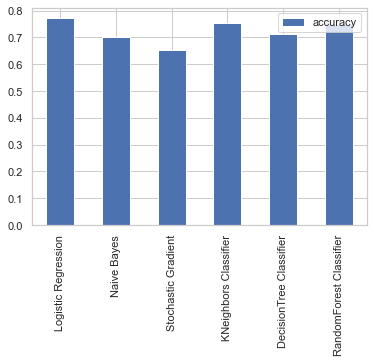

In [33]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [34]:
from sklearn.neighbors import KNeighborsClassifier
# Let's tune KNN
train_scores=[]
test_scores= [] 

# create a list of different values for n_nieghbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    # update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # update the test scores list
    test_scores.append(knn.score(X_test,y_test))

 Maximum KNN score on the test data:77.85%


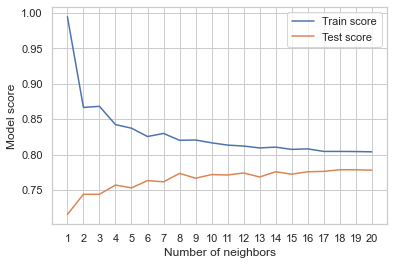

In [35]:
plt.plot(neighbors,train_scores, label = "Train score")
plt.plot(neighbors,test_scores, label = "Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f" Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

In [36]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {"C":np.logspace(-4, 4, 20),
               "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [37]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
# Check the best hyperparmaters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [39]:
# Evaluate the grid search LogisticRegression model
rs_log_reg.score(X_test, y_test)

0.7705848949460534

In [40]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [41]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'customerID': -0.009657910192082408,
 'gender': -0.03197342779784077,
 'SeniorCitizen': 0.0,
 'Partner': 0.0,
 'Dependents': -0.006645876160672008,
 'tenure': -0.1568943812747719,
 'PhoneService': 1.0733391348555856,
 'MultipleLines': -1.1234554960045522,
 'InternetService': -0.12419765914655156,
 'OnlineSecurity': -0.08281308327712214,
 'OnlineBackup': -0.3341487034329616,
 'DeviceProtection': 0.1271379610092333,
 'TechSupport': 0.7161157258509255,
 'StreamingTV': -0.14271267473300486,
 'StreamingMovies': -0.7804137935417016,
 'Contract': -0.10760589656368728,
 'PaperlessBilling': -0.1996638035228118,
 'PaymentMethod': 0.31622655945889966,
 'MonthlyCharges': -0.2159676017961029}

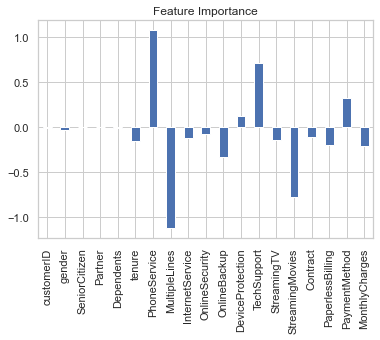

In [42]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend = False);

### Evaluting our tuned machine learning classifier, beyond accuracy
 * ROC curve and AUC score
 * Confusion matrix
 * Classification report
 * Precision
 * Recall
 * F1-score
... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [43]:
# Make predictions with tuned model
y_preds = rs_log_reg.predict(X_test)

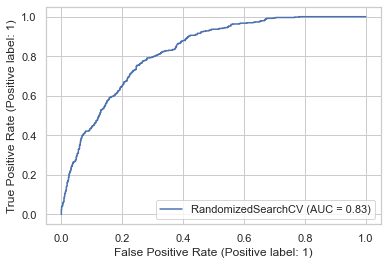

In [44]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(rs_log_reg, X_test, y_test)

In [45]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[1130  142]
 [ 262  227]]


In [46]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [47]:
# Cross-validated accuracy
cv_accuracy = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_accuracy

array([0.79418027, 0.79985806, 0.77501774, 0.79190341, 0.78622159])

In [50]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.6307062448013737

In [51]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.5557286351787233

In [52]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.4970695760634256

In [56]:
clf = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=0)

clf.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)

### Different ways to plot the Decision Tree

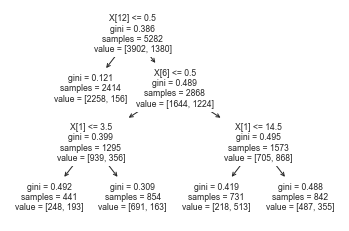

In [57]:
tree.plot_tree(clf)
plt.show()

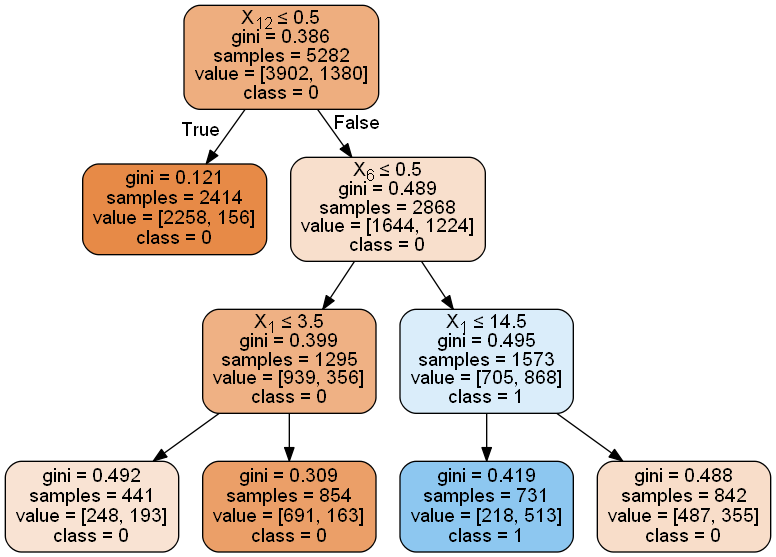

In [58]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
#loading data file
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = None,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Customer_Churn_Prediction.png')
Image(graph.create_png())

In [ ]:
### Conclusion
Customer churn analysis is one of the main metrics that allows the business to minimize the acquisition costs and also to meet the market demands.
This model helps to introduce new ideas for cross-selling and upselling which helps the management a starting point for customer-driven product development.In this model, feature importance can be given to various phone services and providing customer support (24/7) keeping customers engaged and loyal over time.